# Тестовое задание  Awatera
Перед вами файл с выгрузкой продаж за 2 года. Проанализируйте предоставленные данные. Какие закономерности и выводы вы можете сделать на основе этих данных? Попробуйте построить прогноз продаж на 2024 год.
Для анализа примените все инструменты которые мы владеете и в ответном сообщении кратко опишите какие инструменты применяли.

In [1]:
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_excel("BI-тестовое задание.xlsx")

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Предварительный просмотр

In [4]:
df.head()

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма
0,S_167,2022-01-31,14311.88,NaN,К1,3494.39,2022-03-01,2022-03-11,Оплачена,2022-03-01,0
1,S_521,2022-03-10,5027.35,NaN,К1,2613.90,2022-04-01,2022-04-22,Оплачена,2022-04-01,0
2,VL112,2022-03-23,470.85,NaN,К2,226.73,2022-03-23,2022-03-23,Оплачена,NaT,0
3,S_218,2023-02-03,158.12,NaN,К3,12.38,2023-02-08,2023-02-10,Оплачена,2023-02-08,0
4,S_-31,2022-06-10,5064.54,NaN,К4,665.04,2022-06-27,2022-06-29,Оплачена,2022-06-27,0


In [5]:
df.describe()

,Сумма,Сумма исполнителю
count,83958.00,82820.00
mean,5612.42,1606.84
std,11068.96,4122.79
min,0.00,0.00
25%,714.29,187.98
50%,1706.28,421.10
75%,5155.83,1320.15
max,99808.28,268661.00


### странно, что максимальная сумма выплаты исполнителю выше, чем сумма продажи. Проверю это далее

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               83957 non-null  object        
 1   Дата продажи        83958 non-null  datetime64[ns]
 2   Сумма               83958 non-null  float64       
 3   Проданный заказ     2893 non-null   object        
 4   Клиент              83958 non-null  object        
 5   Сумма исполнителю   82820 non-null  float64       
 6   Дата выручки        82590 non-null  datetime64[ns]
 7   Дата оплаты         81315 non-null  datetime64[ns]
 8   Статус счета        83958 non-null  object        
 9   Дата акта           51322 non-null  datetime64[ns]
 10  Неоплаченная сумма  83958 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 7.0+ MB


In [7]:
print(df['Дата продажи'].min(),df['Дата продажи'].max())

2022-01-02 00:00:00 2023-12-31 00:00:00


### Период -  полные два года

In [8]:
df.duplicated().sum()

0

явных дубликатов в данных нет

In [9]:
df['Клиент'].value_counts()

К1       7166
К22      3415
К50      2968
К5       2947
К16      2784
         ... 
К1734       1
К1323       1
К640        1
К847        1
К1979       1
Name: Клиент, Length: 2304, dtype: int64

клиентов меньше, чем строк, то есть клиенты практикуют повторные заказы, можно далее проанализировать динамику

## Аномалии и ошибки

In [10]:
for col in df.columns:
    print(df[col].value_counts())

S_-10    78
S_-11    72
S_-13    70
S_-15    66
S_-19    65
         ..
C30-3     1
BEG-8     1
TV562     1
VI-99     1
T_940     1
Name: Заказ, Length: 20245, dtype: int64
2022-03-14    254
2022-04-12    247
2022-11-07    246
2022-02-16    243
2022-03-10    239
             ... 
2022-07-02      1
2022-05-08      1
2023-01-07      1
2023-02-05      1
2022-01-02      1
Name: Дата продажи, Length: 711, dtype: int64
582.96      1019
582.96       998
0.00         979
807.17       814
538.12       693
            ... 
56363.00       1
5567.35        1
37839.71       1
16229.15       1
3452.12        1
Name: Сумма, Length: 49395, dtype: int64
True     2874
False      19
Name: Проданный заказ, dtype: int64
К1       7166
К22      3415
К50      2968
К5       2947
К16      2784
         ... 
К1734       1
К1323       1
К640        1
К847        1
К1979       1
Name: Клиент, Length: 2304, dtype: int64
179.37     816
0.00       738
196.86     519
224.22     404
206.28     341
          ... 
329.42

### Повторяющиеся номера заказов

есть повторяющиеся номера заказов, что это значит? Это в одном заказе много продуктов или что-то другое? Если в выгрузке есть информация по количеству заказов в продукте, то можно проанализировать динамику.
Смотрю подробнее один из заказов, который повторяется 78 раз:

In [11]:
df[df['Заказ'] == 'S_-10']

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма
614,S_-10,2022-07-19,914.80,NaN,К226,269.06,2022-07-22,2022-09-22,Оплачена,2022-07-22,0
1734,S_-10,2022-06-30,673.77,NaN,К441,9.33,2022-07-11,2022-06-30,Оплачена,2022-07-11,0
4070,S_-10,2022-01-31,12162.24,NaN,К669,NaN,2022-03-04,NaT,Не оплачена,NaT,12162.24
4178,S_-10,2023-12-12,8410.92,NaN,К684,2071.48,2023-12-15,2023-12-15,Оплачена,NaT,0
6905,S_-10,2022-02-01,2251.21,NaN,К868,1658.03,2022-02-10,2022-03-15,Оплачена,2022-02-10,0
...,...,...,...,...,...,...,...,...,...,...,...
76805,S_-10,2022-12-26,0.00,NaN,К257,0.00,NaT,NaT,Нет спецификации,NaT,0
78968,S_-10,2023-06-09,24084.39,NaN,К2101,9753.36,2023-06-09,2023-07-10,Оплачена,2023-06-09,0
79618,S_-10,2023-02-09,1359.55,NaN,К234,122.25,2023-02-27,2023-03-09,Оплачена,2023-02-27,0
83148,S_-10,2022-10-12,154.55,NaN,К1679,24.07,2022-10-13,2022-10-13,Оплачена,NaT,0


заказы с одинаковым номером имеют разные даты и разных клиентов, очевидно, что это разные заказы, просто не уникальные номера заказов.

### Выплаты исполнителям более суммы заказа

In [12]:
strange_orders = df[df['Сумма исполнителю'] > df['Сумма']]
strange_orders.describe()

,Сумма,Сумма исполнителю
count,977.00,977.00
mean,1451.15,3936.94
std,7453.39,14942.44
min,0.00,0.13
25%,0.00,137.33
50%,0.00,642.76
75%,0.00,2643.50
max,91054.76,268661.00


977 заказов, по которым сумма исполнителю больше суммы заказа (большинство заказов с нулевой суммой).

In [13]:
df['Статус счета'].value_counts()

Оплачена             81189
Нет спецификации      1763
Не оплачена            687
Просрочена             213
Частично оплачена       84
Списание                19
reinvoiced               3
Name: Статус счета, dtype: int64

In [14]:
strange_orders['Статус счета'].value_counts()

Нет спецификации    750
Оплачена            212
Не оплачена          13
Списание              2
Name: Статус счета, dtype: int64

## Анализ по годам/периодам

In [15]:
df['Year'] = df['Дата продажи'].dt.year
df['Month'] = df['Дата продажи'].dt.month


In [16]:
df.head()

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма,Year,Month
0,S_167,2022-01-31,14311.88,NaN,К1,3494.39,2022-03-01,2022-03-11,Оплачена,2022-03-01,0,2022,1
1,S_521,2022-03-10,5027.35,NaN,К1,2613.90,2022-04-01,2022-04-22,Оплачена,2022-04-01,0,2022,3
2,VL112,2022-03-23,470.85,NaN,К2,226.73,2022-03-23,2022-03-23,Оплачена,NaT,0,2022,3
3,S_218,2023-02-03,158.12,NaN,К3,12.38,2023-02-08,2023-02-10,Оплачена,2023-02-08,0,2023,2
4,S_-31,2022-06-10,5064.54,NaN,К4,665.04,2022-06-27,2022-06-29,Оплачена,2022-06-27,0,2022,6


### Количество клиентов снизилось на 15%

In [17]:
df.groupby('Year')['Клиент'].nunique()

Year
2022    1747
2023    1484
Name: Клиент, dtype: int64

In [18]:
number_of_customers2022 = df[df['Year'] == 2022]['Клиент'].nunique()
number_of_customers2023 = df[df['Year'] == 2023]['Клиент'].nunique()
cust_num_dif = (number_of_customers2023-number_of_customers2022)/number_of_customers2022*100

In [19]:
cust_num_dif

-15.054378935317688

### Среднее количество заказов на одного клиента

In [20]:
df.groupby('Клиент')['Заказ'].count()

Клиент
К1       7166
К10        13
К100      421
К1000      21
К1001      12
         ... 
К995       20
К996        6
К997        1
К998        2
К999        2
Name: Заказ, Length: 2304, dtype: int64

In [21]:
df[df['Year'] == 2022].groupby('Клиент')['Заказ'].count().mean()

26.028048082427016

In [22]:
df[df['Year'] == 2023].groupby('Клиент')['Заказ'].count().mean()

25.933962264150942

In [23]:
(25.933962264150942-26.028048082427016)/26.028048082427016*100

-0.36147857871676814

Клиенты склонны возвращаться в магазин и среднее количество заказов на клиента практически не изменилось в 2023 г по сравнению с 2022. Снижение менее 0,4%.

<AxesSubplot:>

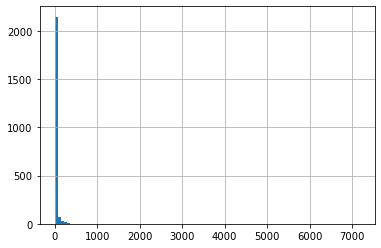

In [24]:
df.groupby('Клиент')['Заказ'].count().hist(bins=100)

In [25]:
order_per_customer = df.groupby('Клиент')['Заказ'].count().reset_index()

In [26]:
order_per_customer

,Клиент,Заказ
0,К1,7166
1,К10,13
2,К100,421
3,К1000,21
4,К1001,12
...,...,...
2299,К995,20
2300,К996,6
2301,К997,1
2302,К998,2


#### аномальные клиенты

<AxesSubplot:title={'center':' Среднее количество заказов на клиента'}, xlabel='Клиент', ylabel='Заказ'>

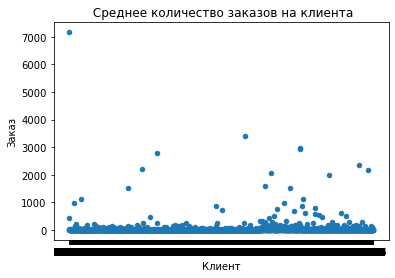

In [27]:
order_per_customer.plot(kind='scatter', x='Клиент', y='Заказ', 
                        title = ' Среднее количество заказов на клиента')

Большинство клиентов делают не так много заказов, есть несколько клиентов с аномально большим количеством заказов. Посмотрим, какое среднее количество заказов без учета аномальных клиентов.

In [28]:
order_per_customer.describe(percentiles = [.75, .95, .98, .99])

,Заказ
count,2304.00
mean,36.44
std,237.72
min,1.00
50%,3.00
75%,12.00
95%,100.55
98%,241.76
99%,630.73
max,7166.00


Выделяю список аномальных клиентов, которые сделали более 630 заказов за 2 года (1% клиентов).

In [29]:
abnormal_customers = order_per_customer[order_per_customer['Заказ'] > 630]['Клиент']
abnormal_customers

0         К1
35      К103
90      К108
445      К14
556      К15
667      К16
1112     К20
1157    К204
1334     К22
1484     К26
1529     К30
1573     К34
1628     К39
1672     К43
1705     К46
1749      К5
1750     К50
1761     К51
1772     К52
1783     К53
1861     К60
1971      К7
2193      К9
2260     К96
Name: Клиент, dtype: object

In [30]:
len(abnormal_customers)

24

смотрю среднее количество заказов на клиента без аномальных клиентов

In [31]:
df[(df['Year'] == 2022) & ~df['Клиент'].isin(abnormal_customers)].groupby('Клиент')['Заказ'].count().mean()

13.172373766686013

In [32]:
df[(df['Year'] == 2023) & ~df['Клиент'].isin(abnormal_customers)].groupby('Клиент')['Заказ'].count().mean()

11.646575342465754

In [33]:
(11.646575342465754 - 13.172373766686013)/13.172373766686013*100

-11.583321664308716

снижение количества заказов более выраженное - на 11,5%

### А есть ли новые клиенты в 2023?

In [34]:
customers22 = df[df['Year'] == 2022]['Клиент'].unique()
customers22

array(['К1', 'К2', 'К4', ..., 'К2303', 'К1626', 'К2305'], dtype=object)

In [35]:
customers23 = df[df['Year'] == 2023]['Клиент'].unique()

In [36]:
new_customers23 = set(customers23) - set(customers22)
len(new_customers23)

557

In [37]:
lost_customers22 = set(customers22) - set(customers23)
len(lost_customers22)

820

Мы теряем клиентов быстрее, чем приобретаем. Так как среднее количество заказов на клиента не изменилось, то можно предположить, что уровень сервиса и привлекательности продавца не стал хуже (и не стал лучше), но наши клиенты мигрируют (или уходят с рынка, или переходят к конкуренту), и новых клиентов мы привлекаем медленнее, чем теряем старых, поэтому происходит снижение продаж.

### качество потерянных и приобретенных клиентов
посмотрим, кого мы потеряли и кого приобрели

In [38]:
lost_cust_orders = df[df['Клиент'].isin(lost_customers22)]
new_cust_orders = df[df['Клиент'].isin(new_customers23)]

In [39]:
lost_cust_orders.groupby('Клиент')['Заказ'].count().mean()

5.181707317073171

In [40]:
new_cust_orders.groupby('Клиент')['Заказ'].count().mean()

3.3770197486535007

Новые клиенты делают меньше заказов, что ожидаемо, но и потерянные клиенты были не из самых лояльных (в среднем 5 заказов на клиента по сравнению с 26 заказами в среднем по всей клиентской базе в 2022 году).

In [41]:
lost_cust_orders.groupby('Клиент')['Сумма'].sum().sum()/len(lost_cust_orders)

5409.6545064271595

In [42]:
new_cust_orders.groupby('Клиент')['Сумма'].sum().sum()/len(new_cust_orders)

9374.660410552897

In [43]:
lost_cust_orders.groupby('Клиент')['Сумма'].sum().mean()

28031.246338791454

In [44]:
new_cust_orders.groupby('Клиент')['Сумма'].sum().mean()

31658.41334335726

In [45]:
diff_average_order_sum = (
    (new_cust_orders.groupby('Клиент')['Сумма'].sum().mean()
     - lost_cust_orders.groupby('Клиент')['Сумма'].sum().mean())
    /lost_cust_orders.groupby('Клиент')['Сумма'].sum().mean()
)


In [46]:
diff_average_sales_per_cust = (
    (new_cust_orders.groupby('Клиент')['Сумма'].sum().sum()/len(new_cust_orders)
     - lost_cust_orders.groupby('Клиент')['Сумма'].sum().sum()/len(lost_cust_orders))
    / lost_cust_orders.groupby('Клиент')['Сумма'].sum().sum()/len(lost_cust_orders) * 100
)
diff_average_sales_per_cust

4.059764549013968e-06

In [47]:
print(f'У новых клиентов больше средняя сумма одного заказа на {diff_average_order_sum:.2%}'
      f' и больше средняя сумма продажи на одного клиента на  {diff_average_sales_per_cust:.2%}.')

У новых клиентов больше средняя сумма одного заказа на 12.94% и больше средняя сумма продажи на одного клиента на  0.00%.


Далее можно исследовать, в какие даты к нам приходили новые клиенты, и сопоставить с периодами наших маркетинговых активностей или что вообще происходило в компании/на рынке, и попробовать оценить результативность рекламы/маркетинга.

### Заказы по месяцам

In [48]:
df.head()

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма,Year,Month
0,S_167,2022-01-31,14311.88,NaN,К1,3494.39,2022-03-01,2022-03-11,Оплачена,2022-03-01,0,2022,1
1,S_521,2022-03-10,5027.35,NaN,К1,2613.90,2022-04-01,2022-04-22,Оплачена,2022-04-01,0,2022,3
2,VL112,2022-03-23,470.85,NaN,К2,226.73,2022-03-23,2022-03-23,Оплачена,NaT,0,2022,3
3,S_218,2023-02-03,158.12,NaN,К3,12.38,2023-02-08,2023-02-10,Оплачена,2023-02-08,0,2023,2
4,S_-31,2022-06-10,5064.54,NaN,К4,665.04,2022-06-27,2022-06-29,Оплачена,2022-06-27,0,2022,6


In [49]:
orders_per_month22 = df[df['Year'] == 2022].groupby('Month')['Заказ'].count()
orders_per_month23 = df[df['Year'] == 2023].groupby('Month')['Заказ'].count()

In [50]:
orders_per_month = orders_per_month22.reset_index()
orders_per_month.index += 1
orders_per_month = orders_per_month.drop('Month', axis=1)
orders_per_month = orders_per_month.rename(columns={'Заказ':2022})

In [51]:
orders_per_month['2023'] = orders_per_month23
orders_per_month

,2022,2023
1,3483,2839
2,4228,3042
3,4352,3707
4,4161,3528
5,3371,3446
6,3707,3372
7,3449,3272
8,3801,3439
9,3823,2987
10,3739,3080


<AxesSubplot:title={'center':'Динамика количества заказов в месяц.'}>

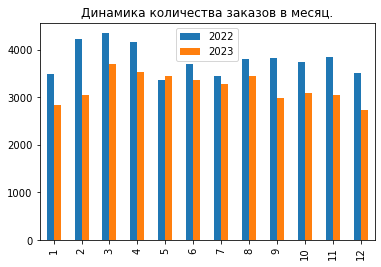

In [52]:
orders_per_month.plot(kind = 'bar', title = 'Динамика количества заказов в месяц.')


снижение количества заказов в месяц при сравнении год к году (кроме мая и вообще летом относительный провал меньше)

### Динамика объема продаж - падение на 7%

In [53]:
df.groupby('Year')['Сумма'].sum()

Year
2022   244041111.38
2023   227166362.29
Name: Сумма, dtype: float64

In [54]:
sales2022 = df[df['Year'] == 2022].groupby('Year')['Сумма'].sum()
sales2023 = df[df['Year'] == 2023].groupby('Year')['Сумма'].sum()
print(sales2022, sales2023)

Year
2022   244041111.38
Name: Сумма, dtype: float64 Year
2023   227166362.29
Name: Сумма, dtype: float64


In [55]:
(227166362.29 - 244041111.38)/244041111.38

-0.0691471571923965

#### объем продаж аномальных клиентов
Аномальные клиенты (abnormal_customers) - это 1% клиентов, которые сделали более 630 заказов за 2 года.

In [56]:
abnormal_sales = df[df['Клиент'].isin(abnormal_customers)].groupby('Year')['Сумма'].sum()

In [57]:
abnormal_share = pd.concat([abnormal_sales, df.groupby('Year')['Сумма'].sum()], axis=1)

In [58]:
abnormal_share.set_axis(['Abnormal','Total'], axis=1, inplace=True)
abnormal_share['Normal'] = abnormal_share['Total'] - abnormal_share['Abnormal']
abnormal_share

,Abnormal,Total,Normal
Year,,,
2022,104701663.57,244041111.38,139339447.81
2023,106093995.35,227166362.29,121072366.94


In [59]:
abnormal_share.loc['Difference'] = abnormal_share.apply(lambda x: (x[2023]-x[2022])/x[2022]*100)

In [60]:
abnormal_share['Abnormal_share %'] = abnormal_share['Abnormal']/ abnormal_share['Total'] * 100

In [61]:
abnormal_share

,Abnormal,Total,Normal,Abnormal_share %
Year,,,,
2022,104701663.57,244041111.38,139339447.81,42.90
2023,106093995.35,227166362.29,121072366.94,46.70
Difference,1.33,-6.91,-13.11,-19.23


### продажи по месяцам

In [62]:
sales_per_month22 = df[df['Year'] == 2022].groupby('Month')['Сумма'].sum()
sales_per_month23 = df[df['Year'] == 2023].groupby('Month')['Сумма'].sum()

In [63]:
sales_per_month = pd.concat([sales_per_month22, sales_per_month23], axis=1)

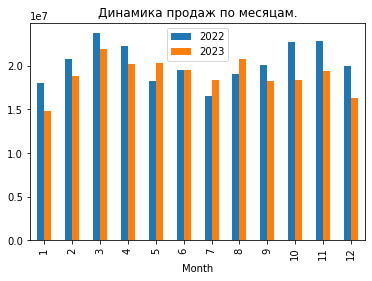

In [64]:
ax = sales_per_month.plot(kind='bar', title='Динамика продаж по месяцам.')
ax.legend(['2022','2023']);

при сравнении месяц к месяцу продажи ниже каждый месяц, кроме периода май-август, но рост в эти месяцы не компенсирует снижение в остальные месяцы

### Динамика выплат исполнителям

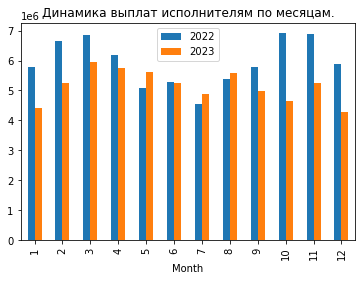

In [65]:
payments_per_month22 = df[df['Year'] == 2022].groupby('Month')['Сумма исполнителю'].sum()
payments_per_month23 = df[df['Year'] == 2023].groupby('Month')['Сумма исполнителю'].sum()
payments_per_month = pd.concat([payments_per_month22, payments_per_month23], axis=1)
ax = payments_per_month.plot(kind='bar', title = 'Динамика выплат исполнителям по месяцам.')
ax.legend(['2022', '2023']);

визуально динамика выплат исполнителям соответствует динамике продаж